Data Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

compact_result_season = pd.read_csv('./data/DataFiles/RegularSeasonCompactResults.csv')


In [2]:
#import the file with team IDs
team_ids = pd.read_csv('./data/DataFiles/Teams.csv')
team_ids.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2018
1,1102,Air Force,1985,2018
2,1103,Akron,1985,2018
3,1104,Alabama,1985,2018
4,1105,Alabama A&M,2000,2018


Groupby command to pull up wins

In [3]:
train, test = train_test_split(compact_result_season, test_size=.2)

In [4]:
wins_mat = train.groupby('WTeamID').size().to_frame()
loss_mat = train.groupby('LTeamID').size().to_frame()

In [5]:
simplee_prop = (wins_mat)/(wins_mat+loss_mat)

simplee_prop.columns=['Win_prop']

simplee_prop['TeamID'] = simplee_prop.index

,Win_prop,TeamID
WTeamID,,
1101,0.246914,1101
1102,0.371014,1102
1103,0.587097,1103
1104,0.621588,1104
1105,0.378378,1105
1106,0.453770,1106
1107,0.492891,1107
1108,0.349096,1108
1109,0.238806,1109


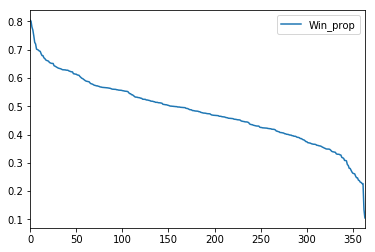

In [6]:
merged_with_ids = pd.merge(simplee_prop, team_ids)

sorted_wins =merged_with_ids.sort_values('Win_prop', ascending=False).reset_index()


sorted_wins.reset_index().plot(y= 'Win_prop', use_index = True)

simplee_prop.sort_index()

Function to calculate probability based on simple model

In [7]:
def calc_win(row):
    # prop that team_i wins over team_j
    i = row['WTeamID']
    j = row['LTeamID']
    pw_i = float(simplee_prop[simplee_prop['TeamID'] == i]['Win_prop'])
    pw_j = float(simplee_prop[simplee_prop['TeamID'] == j]['Win_prop'])
    return 1. / (1 + (pw_j / pw_i) * (1 - pw_i)/(1 - pw_j))

    

In [8]:
test['win_prob'] = test.apply(calc_win, axis=1)

/Users/Santiago/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


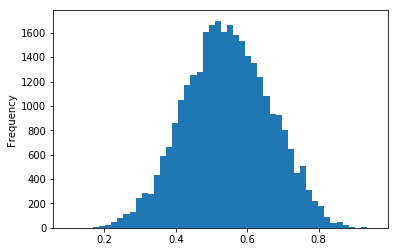

In [9]:
test['win_prob'].plot.hist(bins=50)

In [10]:
named_test = pd.merge(test, team_ids[['TeamID', 'TeamName']], left_on='WTeamID', right_on='TeamID')

Manipulate the data to include the right column names

In [11]:
named_test.columns = [u'Season', u'DayNum', u'WTeamID', u'WScore', u'LTeamID', u'LScore',
       u'WLoc', u'NumOT', u'win_prob', u'TeamID', u'WTeamName']

named_test = named_test.drop('TeamID', axis=1)

named_test = pd.merge(named_test, team_ids[['TeamID', 'TeamName']], left_on='LTeamID', right_on='TeamID')

named_test.columns = [   u'Season',    u'DayNum',   u'WTeamID',    u'WScore',   u'LTeamID',
          u'LScore',      u'WLoc',     u'NumOT',  u'win_prob', u'WTeamName',
          u'TeamID',  u'LTeamName']

In [12]:
named_test.drop('TeamID', axis=1, inplace=True)

named_test.sort_values('win_prob')

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,win_prob,WTeamName,LTeamName
29728,1985,96,1327,61,1191,59,A,0,0.100163,Okla City,Evansville
19764,2009,11,1440,111,1246,103,A,0,0.126415,VMI,Kentucky
24198,2014,75,1188,67,1293,60,H,0,0.130642,Edwardsville,Murray St
27573,2007,30,1152,86,1431,82,A,0,0.159694,Chicago St,UTEP
30126,2015,89,1152,56,1213,55,A,0,0.161043,Chicago St,Grand Canyon
15247,2001,105,1154,62,1158,58,H,0,0.174035,Citadel,Col Charleston
15248,2002,98,1154,60,1158,58,H,0,0.174035,Citadel,Col Charleston
24475,1994,68,1226,81,1211,76,H,0,0.178941,Idaho St,Gonzaga
19631,2016,37,1188,76,1356,74,A,0,0.182946,Edwardsville,S Illinois
1955,1985,28,1152,60,1455,49,A,0,0.184951,Chicago St,Wichita St


In [13]:
conference_df = pd.read_csv('./data/DataFiles/TeamConferences.csv')

conference_df['ConfAbbrev'].unique()

array(['a_sun', 'a_ten', 'acc', 'big_east', 'big_eight', 'big_sky',
       'big_ten', 'ecacm', 'ecacn', 'ecacs', 'ecc', 'gsc', 'ind', 'ivy',
       'maac', 'mac', 'meac', 'metro', 'mid_cont', 'mvc', 'mw_city', 'ovc',
       'pac_ten', 'pcaa', 'sec', 'southern', 'southland', 'sun_belt',
       'swac', 'swc', 'wac', 'wcc', 'big_south', 'caa', 'mw_coll', 'asc',
       'big_west', 'nac', 'nec', 'patriot', 'gmwc', 'awc', 'cusa', 'aec',
       'big_twelve', 'mwc', 'horizon', 'summit', 'gwc', 'pac_twelve', 'aac'], dtype=object)

In [14]:
compact_result_season = pd.merge(compact_result_season, conference_df, left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'])
compact_result_season.columns



Index([u'Season', u'DayNum', u'WTeamID', u'WScore', u'LTeamID', u'LScore',
       u'WLoc', u'NumOT', u'TeamID', u'ConfAbbrev'],
      dtype='object')

In [15]:
compact_result_season.columns = [u'Season', u'DayNum', u'WTeamID', u'WScore', u'LTeamID', u'LScore',
       u'WLoc', u'NumOT', u'TeamID', u'WConf']

In [16]:
compact_result_season.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,TeamID,WConf
0,1985,20,1228,81,1328,64,N,0,1228,big_ten
1,1985,25,1228,64,1226,44,N,0,1228,big_ten
2,1985,27,1228,75,1332,72,N,3,1228,big_ten
3,1985,30,1228,81,1152,63,H,0,1228,big_ten
4,1985,33,1228,73,1328,70,H,0,1228,big_ten


In [17]:
compact_result_season.drop('TeamID', axis=1, inplace=True)

In [18]:
compact_result_season = pd.merge(compact_result_season, conference_df, left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'])

In [19]:
compact_result_season.drop('TeamID', axis=1, inplace=True)

In [20]:
compact_result_season.columns = [    u'Season',     u'DayNum',    u'WTeamID',     u'WScore',
          u'LTeamID',     u'LScore',       u'WLoc',      u'NumOT',
            u'WConf', u'LConf']

In [21]:
PPG_season_W_mean = compact_result_season.groupby(['WTeamID', 'Season'])['WScore'].mean().to_frame()

In [22]:
PPG_season_W_mean.reset_index(inplace=True)

In [23]:
PPG_season_W_mean.columns = [u'WTeamID', u'Season', u'season_mean_WScore']

In [24]:
compact_result_season = pd.merge(compact_result_season, PPG_season_W_mean)

In [25]:
PPG_season_L_mean = compact_result_season.groupby(['LTeamID', 'Season'])['LScore'].mean().to_frame()

In [26]:
PPG_season_L_mean.reset_index(inplace=True)
PPG_season_L_mean.columns = [u'LTeamID', u'Season', u'season_mean_LScore']

In [27]:
compact_result_season = pd.merge(compact_result_season, PPG_season_L_mean)

In [28]:
compact_result_season.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WConf,LConf,season_mean_WScore,season_mean_LScore
0,1985,20,1228,81,1328,64,N,0,big_ten,big_eight,73.217391,75.0
1,1985,33,1228,73,1328,70,H,0,big_ten,big_eight,73.217391,75.0
2,1985,118,1242,82,1328,76,H,0,big_eight,big_eight,78.652174,75.0
3,1985,54,1374,85,1328,76,N,0,swc,big_eight,78.772727,75.0
4,1985,72,1409,104,1328,89,H,0,mvc,big_eight,82.136364,75.0


In [29]:
avg_score_test = compact_result_season

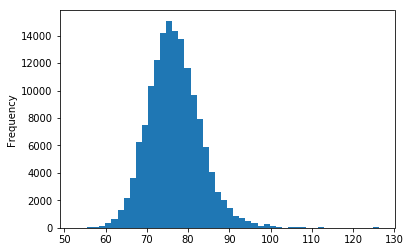

In [32]:
avg_score_test['season_mean_WScore'].plot.hist(bins=50)

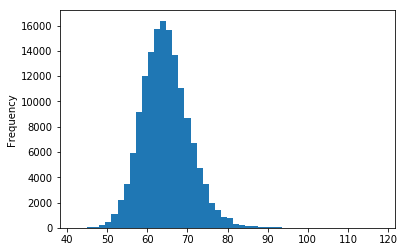

In [34]:
avg_score_test['season_mean_LScore'].plot.hist(bins=50)

In [35]:
avg_score_test['season_mean_LScore'].mean()

64.57284781397183

In [36]:
avg_score_test['season_mean_WScore'].mean()

76.67355525470234

In [39]:
avg_score_test[avg_score_test['WTeamID']==1228]['WScore'].mean()

77.55982274741507

In [40]:
avg_score_test[avg_score_test['WTeamID']==1228]['LScore'].mean()

62.52584933530281

Find the teams that allow the lowest scores -  per each season

In [41]:
#function to go through each winning team and the average score of points they allow
def defense_points(row):
    i = row['WTeamID']
    ppg_scored = row[i]['WScore'].mean()
    ppg_allowed = row[i]['LScore'].mean()
    
    return ppg_allowed



In [42]:
avg_score_test.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WConf,LConf,season_mean_WScore,season_mean_LScore
0,1985,20,1228,81,1328,64,N,0,big_ten,big_eight,73.217391,75.0
1,1985,33,1228,73,1328,70,H,0,big_ten,big_eight,73.217391,75.0
2,1985,118,1242,82,1328,76,H,0,big_eight,big_eight,78.652174,75.0
3,1985,54,1374,85,1328,76,N,0,swc,big_eight,78.772727,75.0
4,1985,72,1409,104,1328,89,H,0,mvc,big_eight,82.136364,75.0


In [45]:
avg_score_test.groupby('WTeamID').size().to_frame()

,0
WTeamID,
1101,27
1102,319
1103,543
1104,628
1105,181
1106,401
1107,271
1108,311
1109,42
